In [1]:
# 股票数据的获取
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import akshare as ak
import warnings 
import time
warnings.filterwarnings('ignore')
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

In [18]:
stock_600519=ak.stock_zh_a_hist(
    symbol="600519",
    period="daily",
    start_date="20240101",
    end_date="20240704",
    adjust="hfq"
)

stock_600519

,日期,股票代码,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率
0,2024-01-02,600519,9548.13,9397.44,9564.16,9362.72,32156,5.440083e+09,2.10,-2.14,-205.97,0.26
1,2024-01-03,600519,9377.84,9442.61,9448.74,9353.83,20229,3.411401e+09,1.01,0.48,45.17,0.16
2,2024-01-04,600519,9437.59,9316.99,9437.59,9286.49,21551,3.603970e+09,1.60,-1.33,-125.62,0.17
3,2024-01-05,600519,9278.45,9288.65,9365.53,9232.13,20243,3.373156e+09,1.43,-0.30,-28.34,0.16
4,2024-01-08,600519,9276.80,9191.32,9281.82,9171.33,25586,4.211919e+09,1.19,-1.05,-97.33,0.20
...,...,...,...,...,...,...,...,...,...,...,...,...
116,2024-06-28,600519,8522.45,8459.09,8595.26,8442.06,38582,5.699649e+09,1.79,-1.35,-116.07,0.31
117,2024-07-01,600519,8466.58,8323.37,8487.23,8261.16,32161,4.636689e+09,2.67,-1.60,-135.72,0.26
118,2024-07-02,600519,8286.29,8576.22,8612.90,8286.29,51853,7.659167e+09,3.92,3.04,252.85,0.41
119,2024-07-03,600519,8617.93,8622.95,8688.32,8562.75,31573,4.740808e+09,1.46,0.54,46.73,0.25


<Axes: xlabel='日期'>

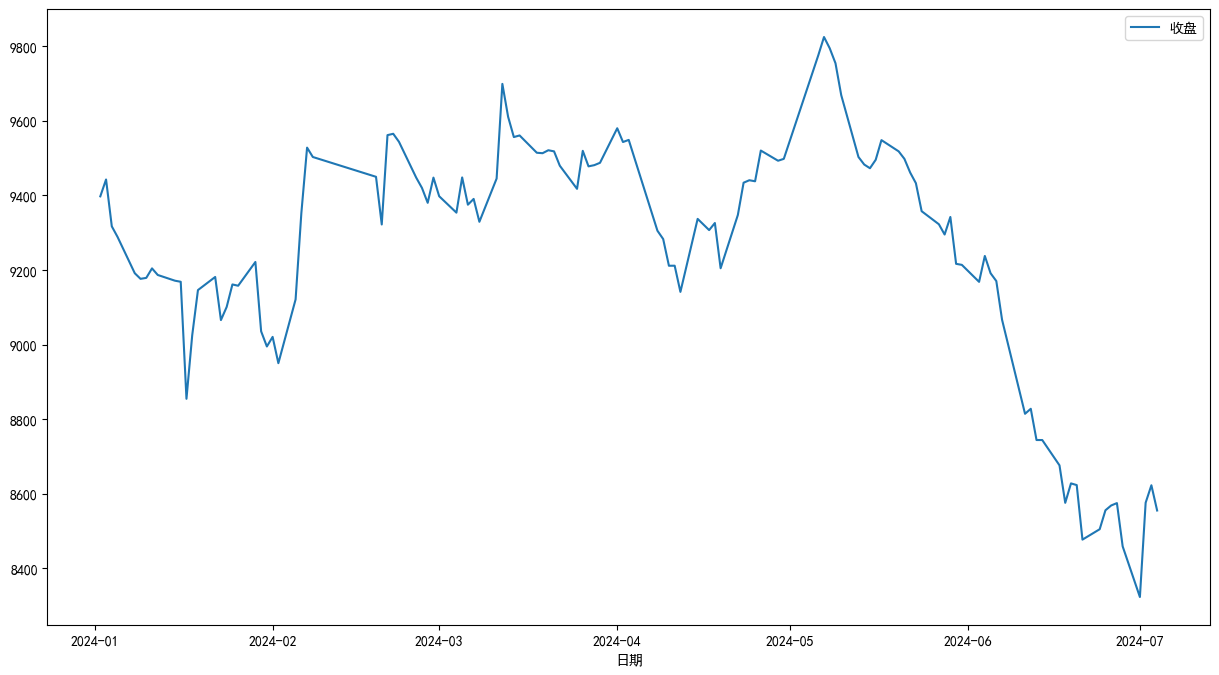

In [19]:
stock_600519.plot(x='日期',y='收盘',figsize=(15,8))

## 前复权
保持当前价格不变，将历史价格进行增减，从而使股价连续
适合看盘，看出股价的历史走势，
缺点：
1. 不同时点看到的历史前复权可能会出现差异
2. 对于有持续分红的公司来说，前复权可能出现负值

## 后复权
保证历史价格不变，每次股票权益事件发生后，调整当前股票价格

看盘用前复权，研究用后复权


In [20]:
#获取股票数据
stock_000001=ak.stock_zh_a_hist(
    symbol="000001",
    period="daily",
    start_date="20240101",
    end_date="20240704",
    adjust="hfq"
)
#展示后复权平安银行趋势图
stock_000001

,日期,股票代码,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率
0,2024-01-02,000001,1778.36,1749.10,1783.23,1749.10,1158366,1.075742e+09,1.92,-1.65,-29.26,0.60
1,2024-01-03,000001,1745.85,1747.48,1750.73,1739.35,733610,6.736736e+08,0.65,-0.09,-1.62,0.38
2,2024-01-04,000001,1745.85,1732.85,1745.85,1727.97,864194,7.874701e+08,1.02,-0.84,-14.63,0.45
3,2024-01-05,000001,1731.22,1758.85,1786.48,1726.35,1991622,1.852660e+09,3.47,1.50,26.00,1.03
4,2024-01-08,000001,1752.35,1739.35,1763.73,1732.85,1121156,1.029007e+09,1.76,-1.11,-19.50,0.58
...,...,...,...,...,...,...,...,...,...,...,...,...
116,2024-06-28,000001,2010.61,2018.74,2036.61,2008.98,918090,9.339478e+08,1.37,0.16,3.25,0.47
117,2024-07-01,000001,2008.98,2051.24,2051.24,2000.86,1343051,1.372550e+09,2.50,1.61,32.50,0.69
118,2024-07-02,000001,2043.12,2059.37,2072.37,2039.86,1384386,1.440864e+09,1.58,0.40,8.13,0.71
119,2024-07-03,000001,2059.37,2044.74,2064.24,2041.49,713067,7.373264e+08,1.10,-0.71,-14.63,0.37


<Axes: xlabel='日期'>

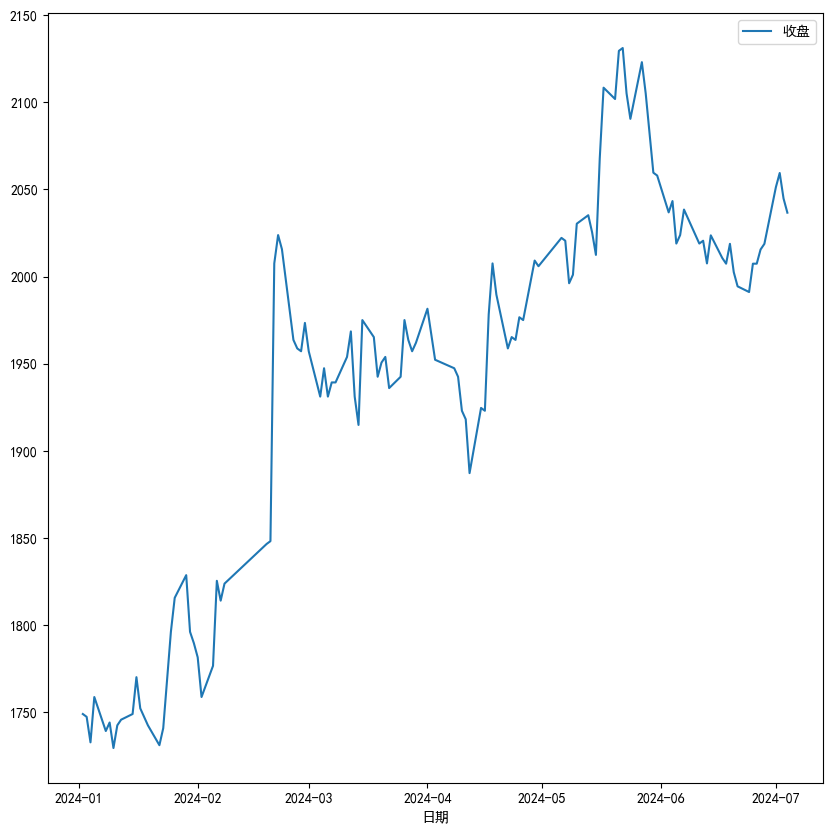

In [21]:
stock_000001.plot(x='日期',y='收盘',figsize=(10,10))

In [40]:
get_futures_daily_hist = ak.get_futures_daily(start_date="20231101", end_date="20231130", market="SHFE")
get_futures_daily_hist

,index,symbol,date,open,high,low,close,volume,open_interest,turnover,settle,pre_settle,variety
0,0,CU2311,20231101,67430,67560,67230,67380,15488,53890,5.216128e+05,67350,67480,CU
1,1,CU2312,20231101,67330,67450,67080,67280,54200,153306,1.822882e+06,67260,67430,CU
2,2,CU2401,20231101,67130,67330,66950,67170,25933,95376,8.704406e+05,67120,67360,CU
3,3,CU2402,20231101,67190,67300,66930,67130,7820,36761,2.623460e+05,67090,67260,CU
4,4,CU2403,20231101,67160,67290,66940,67130,3565,24365,1.196099e+05,67100,67370,CU
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6092,272,EC2410,20231130,824,868.3,818,858.1,722,4036,3.067133e+03,849.6,817.4,EC
6093,273,EC2412,20231130,881.3,947,881.3,935.0,84,628,3.902900e+02,929.2,891.6,EC
6094,274,SC_TAS2401,20231130,,,,0.0,0,,0.000000e+00,,,SC_TAS
6095,275,SC_TAS2402,20231130,,,,0.0,0,,0.000000e+00,,,SC_TAS


In [23]:
get_futures_daily_hist.describe()

,index,volume,turnover
count,33798.000000,3.379800e+04,3.379800e+04
mean,139.166637,2.857748e+04,3.275983e+05
std,80.643515,1.348635e+05,1.425096e+06
min,0.000000,0.000000e+00,0.000000e+00
25%,69.000000,7.000000e+00,6.822625e+01
50%,139.000000,2.380000e+02,2.282784e+03
75%,209.000000,6.479500e+03,6.539552e+04
max,281.000000,4.756248e+06,5.357061e+07


In [24]:
#查询cu2312
get_futures_daily_hist.query("symbol=='CU2402'")

,index,symbol,date,open,high,low,close,volume,open_interest,turnover,settle,pre_settle,variety
1,1,CU2402,20240102,68750,69050,68630,68960.0,31322,141057,1077825.195,68820,68970,CU
280,1,CU2402,20240103,68670,68850,68500,68610.0,48693,135896,1670805.135,68620,68820,CU
559,1,CU2402,20240104,68350,68690,68220,68390.0,55387,131273,1894912.265,68420,68620,CU
838,1,CU2402,20240105,68200,68570,68120,68390.0,45301,126435,1548172.695,68350,68420,CU
1117,1,CU2402,20240108,68190,68550,68080,68280,54382,123663,1855715.565,68240,68350,CU
1396,1,CU2402,20240109,68090,68430,67930,68220,47529,125217,1620260.080,68170,68240,CU
1675,1,CU2402,20240110,67980,68180,67770,67810.0,59701,125294,2027926.775,67930,68170,CU
1954,1,CU2402,20240111,68010,68230,67670,68190,45167,118216,1536507.110,68030,67930,CU
2233,1,CU2402,20240112,68160,68300,67820,68200,41754,112517,1421565.505,68090,68030,CU
2512,1,CU2402,20240115,68010,68150,67640,67700.0,45996,108749,1560513.820,67850,68090,CU


<Axes: xlabel='date'>

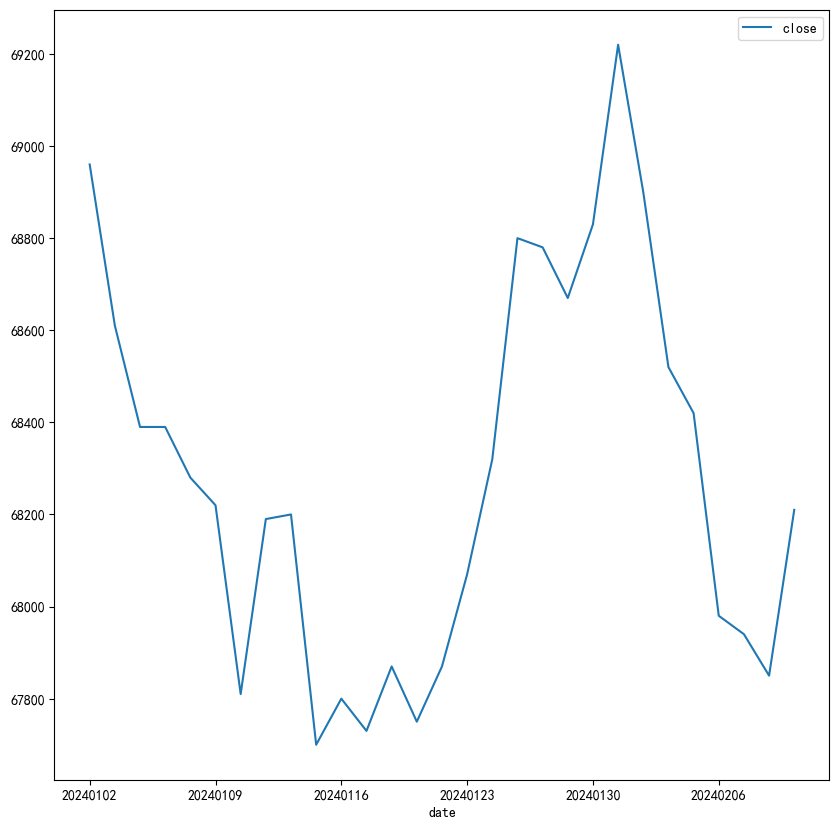

In [25]:
get_futures_daily_hist.query("symbol=='CU2402'").plot(x='date',y='close',figsize=(10,10))

数据整理的要求：
1. 数据变得更加完整，完整连续的
2. 数据变得更加准确，数据是真实和准确的，灭有较大的错误或偏差



In [26]:
stock_600519_test=stock_600519[['收盘','日期']]
stock_600519_test.isnull().sum()

收盘    0
日期    0
dtype: int64

In [27]:
stock_600519_test

,收盘,日期
0,9397.44,2024-01-02
1,9442.61,2024-01-03
2,9316.99,2024-01-04
3,9288.65,2024-01-05
4,9191.32,2024-01-08
...,...,...
116,8459.09,2024-06-28
117,8323.37,2024-07-01
118,8576.22,2024-07-02
119,8622.95,2024-07-03


In [28]:
#查看数据格式,是否为时间格式
stock_600519_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   收盘      121 non-null    float64
 1   日期      121 non-null    object 
dtypes: float64(1), object(1)
memory usage: 2.0+ KB


In [29]:
#价格数据为float无需调整，但是日期为obj格式，需要调整到datetime格式，避免后期测试报错
stock_600519_test['日期']=pd.to_datetime(stock_600519_test['日期'])


In [30]:
stock_600519_test.set_index('日期',inplace=True)

In [31]:
stock_600519_test

,收盘
日期,
2024-01-02,9397.44
2024-01-03,9442.61
2024-01-04,9316.99
2024-01-05,9288.65
2024-01-08,9191.32
...,...
2024-06-28,8459.09
2024-07-01,8323.37
2024-07-02,8576.22


In [32]:
stock_600519_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 121 entries, 2024-01-02 to 2024-07-04
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   收盘      121 non-null    float64
dtypes: float64(1)
memory usage: 1.9 KB


In [33]:
#查看数据是否有0或者负数的
stock_600519_test.apply(lambda x:x[x<=0].value_counts())

,收盘
收盘,


<Axes: xlabel='日期'>

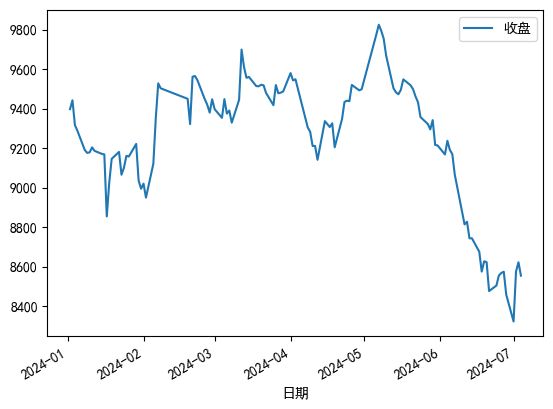

In [34]:
stock_600519_test.plot()

<Axes: >

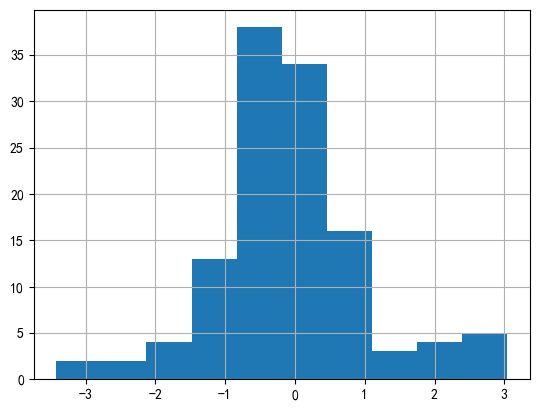

In [35]:
#直方分布图
stock_600519['涨跌幅'].hist()

In [44]:
#期货的相关性研究探索
get_futures_pivot_tabl=get_futures_daily_hist.pivot_table(values='close',index='date',columns='symbol',aggfunc='sum')

In [45]:
get_futures_pivot_tabl

symbol,AG2311,AG2312,AG2401,AG2402,AG2403,AG2404,AG2405,AG2406,AG2407,AG2408,...,ZN2402,ZN2403,ZN2404,ZN2405,ZN2406,ZN2407,ZN2408,ZN2409,ZN2410,ZN2411
date,,,,,,,,,,,,,,,,,,,,,
20231101,5759,5762,5770,5775,5783,5791,5800,5805,5813,5826,...,20790,20765,20715,20685,20640,20710,20600,20590,20560,NaN
20231102,5820,5821,5830,5840,5844,5853,5860,5863,5871,5876,...,21380,21355,21330,21290,21200,21205,21125,21105,21035,NaN
20231103,5798,5800,5809,5817,5824,5832,5841,5843,5853,5860,...,21305,21280,21250,21205,21140,21095,21000,21025,20995,NaN
20231106,5853,5856,5866,5876,5881,5890,5897,5900,5911,5927,...,21335,21315,21245,21215,21175,21105,21075,21050,21025,NaN
20231107,5808.0,5810.0,5818.0,5828.0,5833.0,5842.0,5850.0,5856.0,5867.0,5879.0,...,21460.0,21430.0,21430.0,21365.0,21385.0,21275.0,21300.0,21235.0,21230.0,NaN
20231108,5741.0,5738.0,5747.0,5753.0,5758.0,5769.0,5778.0,5785.0,5798.0,5809.0,...,21630.0,21620.0,21560.0,21460.0,21400.0,21420.0,21405.0,21355.0,21315.0,NaN
20231109,5715,5717,5725,5731,5739,5747,5760,5763,5774,5786,...,21655,21655,21620,21565,21525,21510,21480,21400,21405,NaN
20231110,5768.0,5764.0,5772.0,5779.0,5788.0,5796.0,5805.0,5812.0,5820.0,5832.0,...,21635.0,21600.0,21560.0,21545.0,21525.0,21400.0,21425.0,21315.0,21400.0,NaN
20231113,5670,5676,5685,5688,5695,5705,5715,5722,5734,5743,...,21540,21505,21475,21390,21410,21420,21380,21325,21325,NaN


In [38]:
get_futures_pivot_tabl.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121 entries, 20240102 to 20240704
Columns: 419 entries, AG2401 to ZN2506
dtypes: object(419)
memory usage: 397.0+ KB


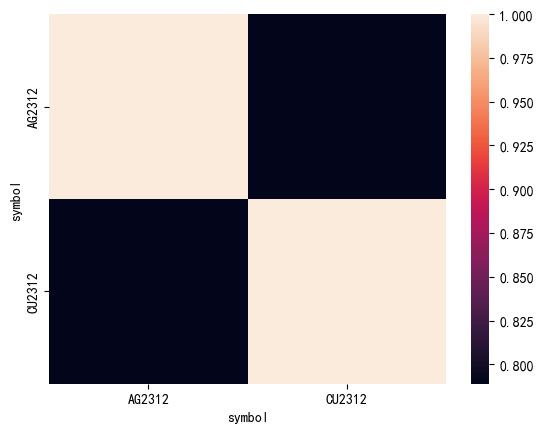

In [46]:
import seaborn as sns    
get_futures_pivot_tabl.loc[:,['AG2312','CU2312']]#找出部分合约来看看相关性
# 绘制热力图  
sns.heatmap(get_futures_pivot_tabl.loc[:,['AG2312','CU2312']].corr())  
# 显示图形  
plt.show()

In [3]:
volatility_array=np.random.normal(size=100)/100

volatility_array

array([-0.00731741,  0.01266576,  0.00371036, -0.00719419,  0.00935307,
       -0.00860119,  0.00067481,  0.00635112,  0.00048281,  0.00805487,
       -0.00345828, -0.00274372, -0.00090457, -0.00102178,  0.00433691,
        0.01439387, -0.01442545,  0.00478534, -0.00641406, -0.01318814,
       -0.00475944, -0.01271634, -0.00190293, -0.0047516 , -0.02097368,
        0.0113957 , -0.00171812, -0.01366266,  0.00191154,  0.01588101,
        0.00654683, -0.00367964,  0.00070915,  0.01534683,  0.00868209,
        0.01462463,  0.00977978, -0.00923374, -0.01021014, -0.00031849,
       -0.00074365,  0.01046286, -0.00826477,  0.00474911, -0.00769994,
       -0.00337034, -0.01042406,  0.02392372, -0.01546246, -0.00296101,
        0.01193457,  0.00186056, -0.00342913,  0.00252466,  0.02528943,
        0.01675931, -0.0067856 ,  0.01176808,  0.00824316,  0.01177967,
       -0.00150461,  0.00104193,  0.01769191,  0.01075101,  0.01181062,
        0.01623087,  0.00461137, -0.00344412, -0.01864608,  0.00